In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]


In [3]:
df = pd.read_csv("shopping_trends.csv")
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.90,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.20,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.20,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.60,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.80,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [4]:
df.shape

(3900, 19)

In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [7]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


In [8]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [9]:
df.duplicated().sum()

0

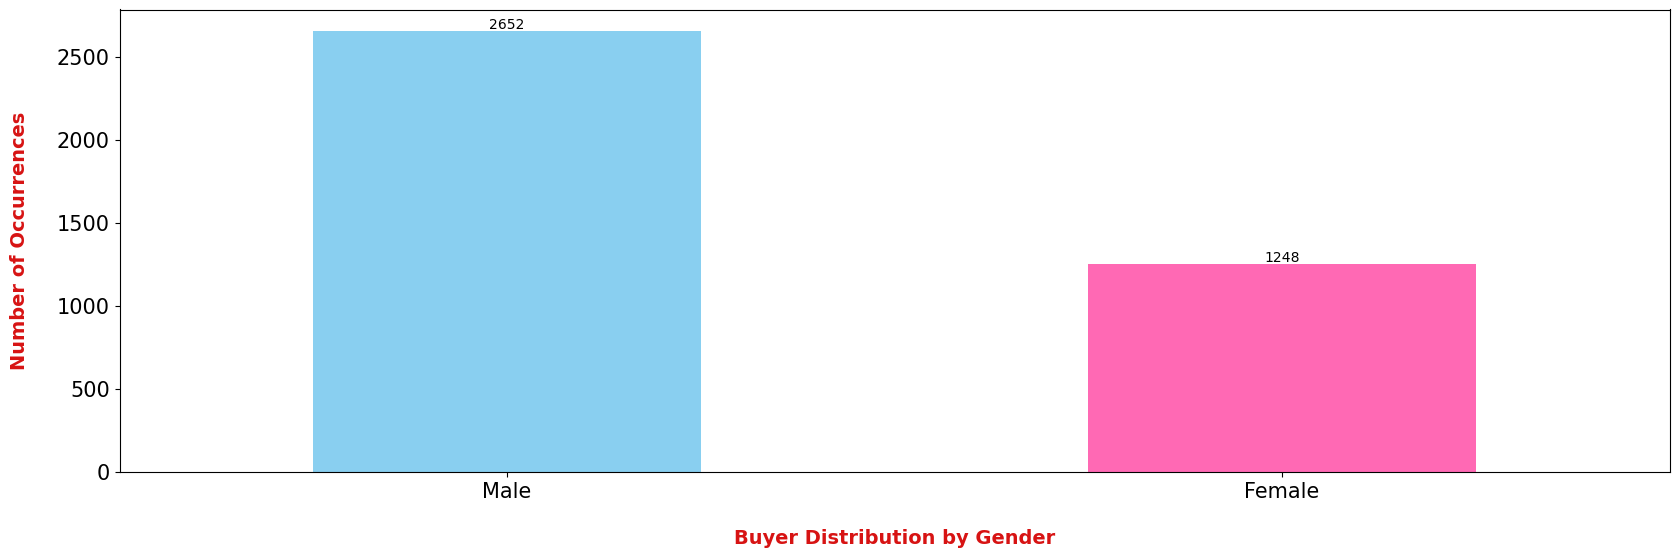

In [10]:
plt.figure(figsize = (20, 6))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Buyer Distribution by Gender', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

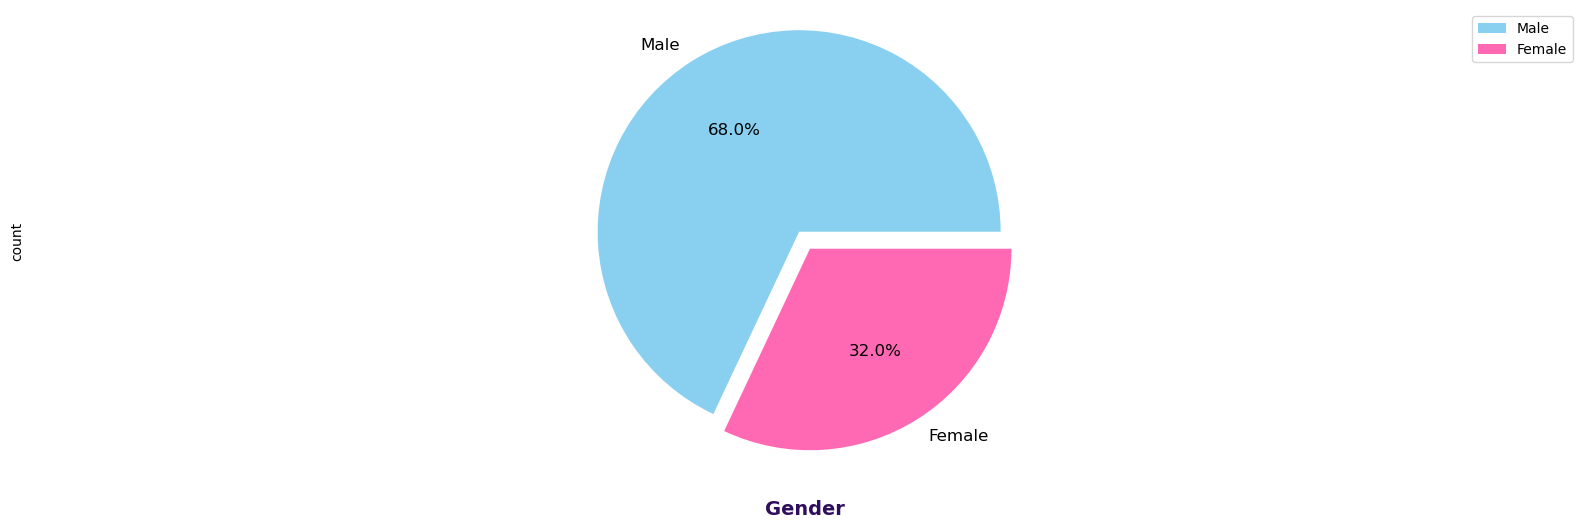

In [11]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

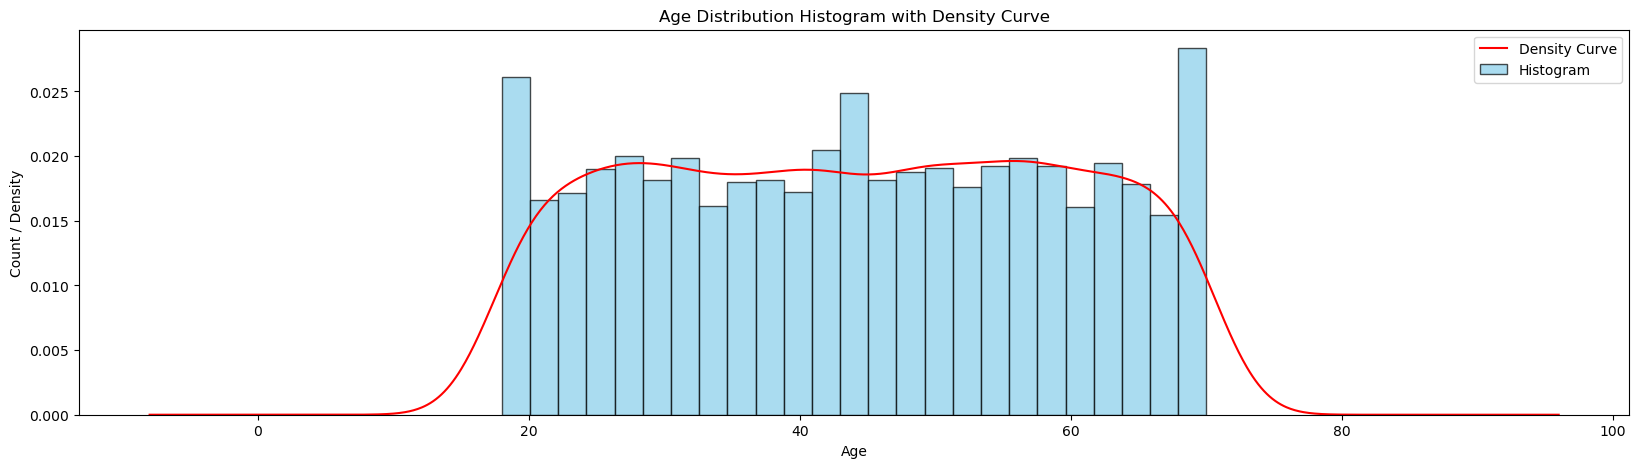

In [12]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

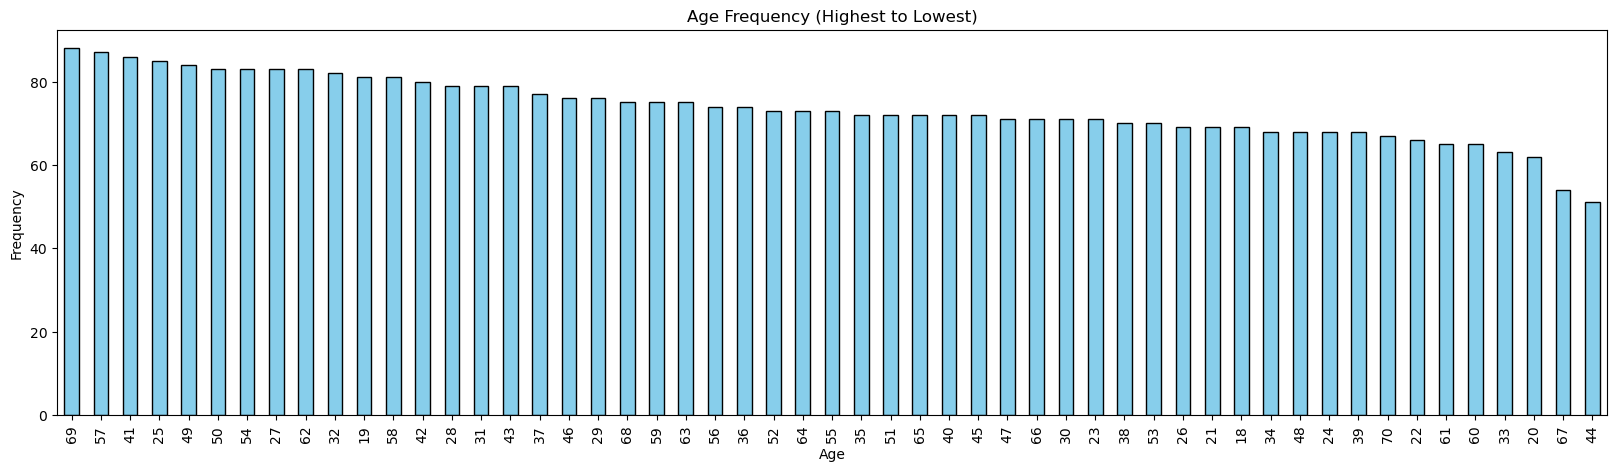

In [13]:
# Calculate age frequency
age_frequency = df['Age'].value_counts()

# Sort by frequency in descending order
sorted_age_frequency = age_frequency.sort_values(ascending=False)

# Plot age frequency from highest to lowest
plt.figure(figsize=(20, 5))
sorted_age_frequency.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age Frequency (Highest to Lowest)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt

In [14]:
# Calculate and print the average age
avg_age = df['Age'].mean()
print(f'Average Age: {avg_age:.2f}')

Average Age: 44.07


In [15]:
df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

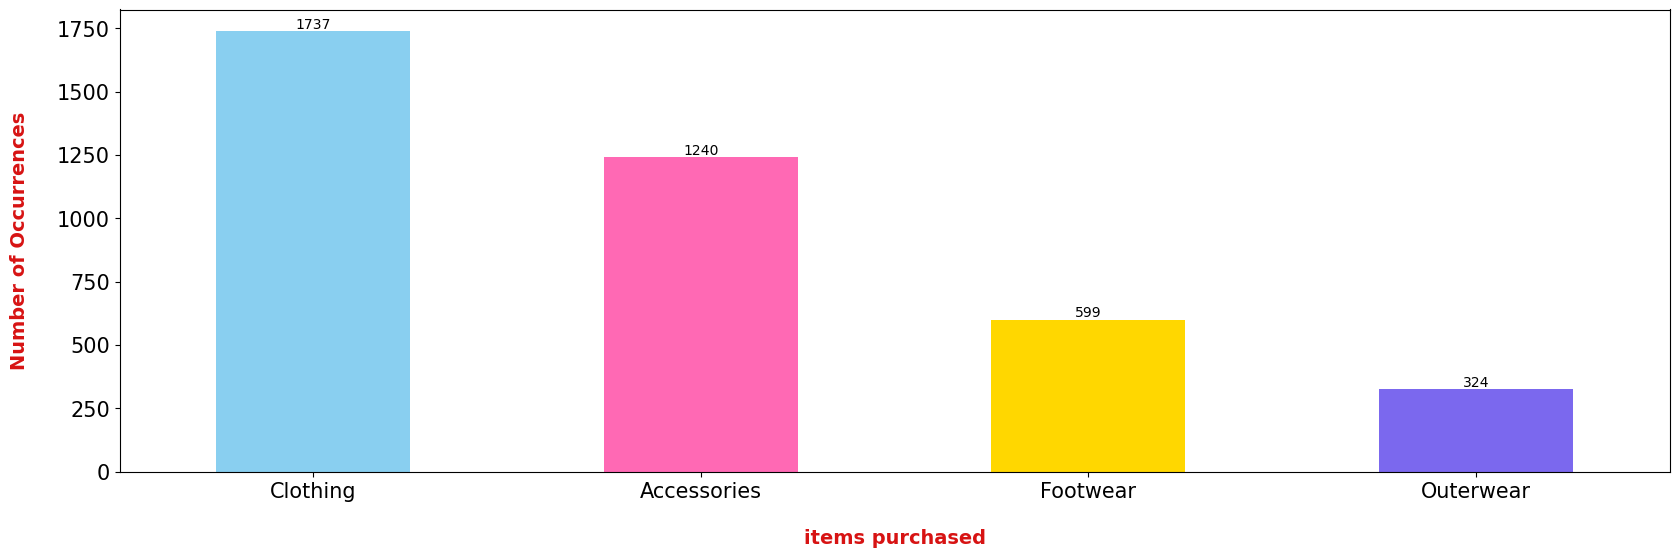

In [16]:
plt.figure(figsize = (20, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('items purchased', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

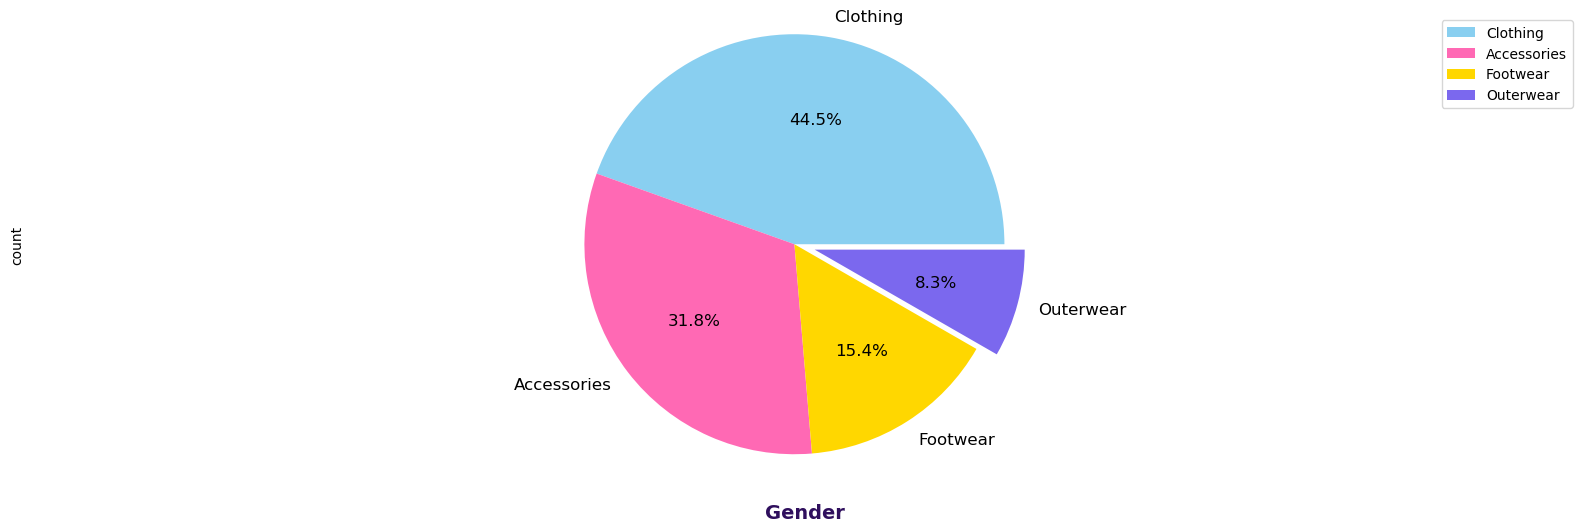

In [17]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [18]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

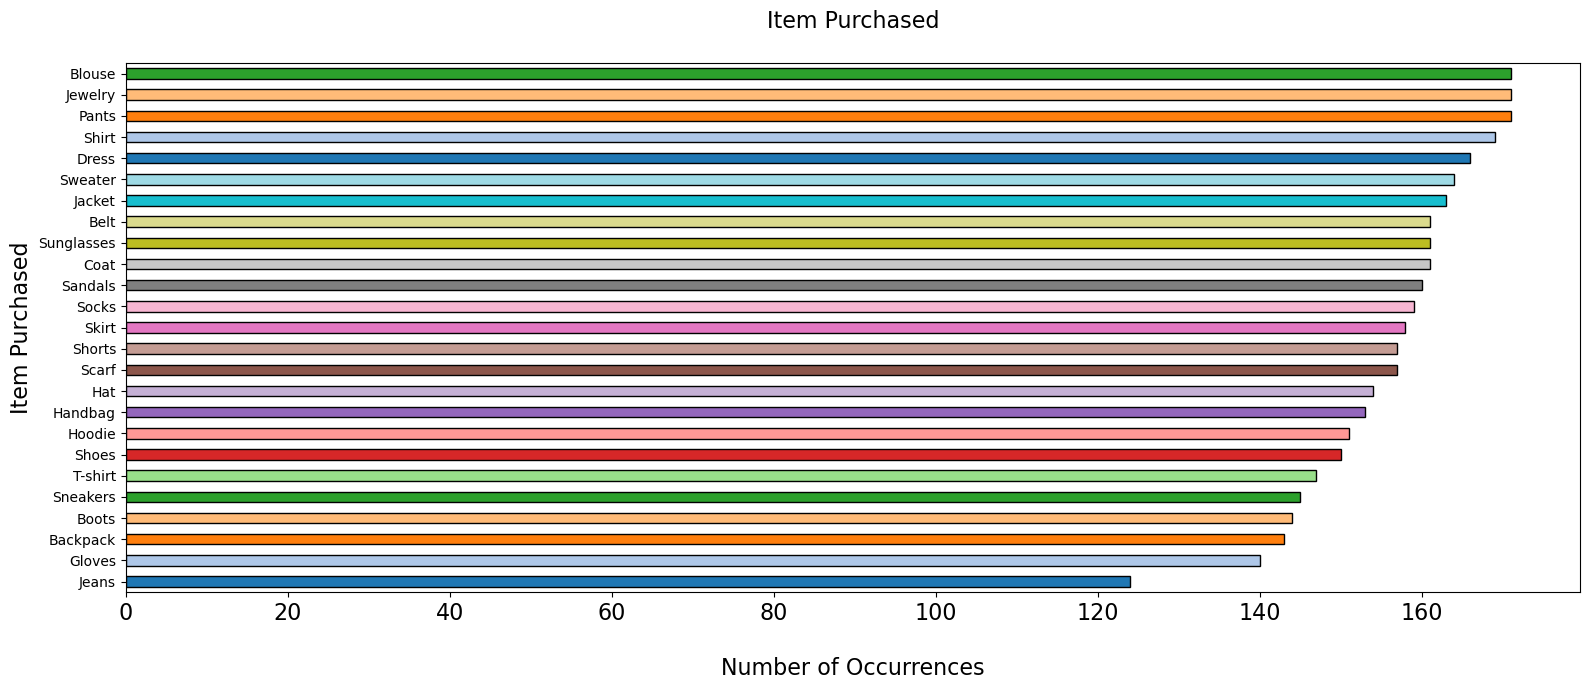

In [19]:
plt.figure(figsize = (16, 7))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [20]:
df["Location"].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

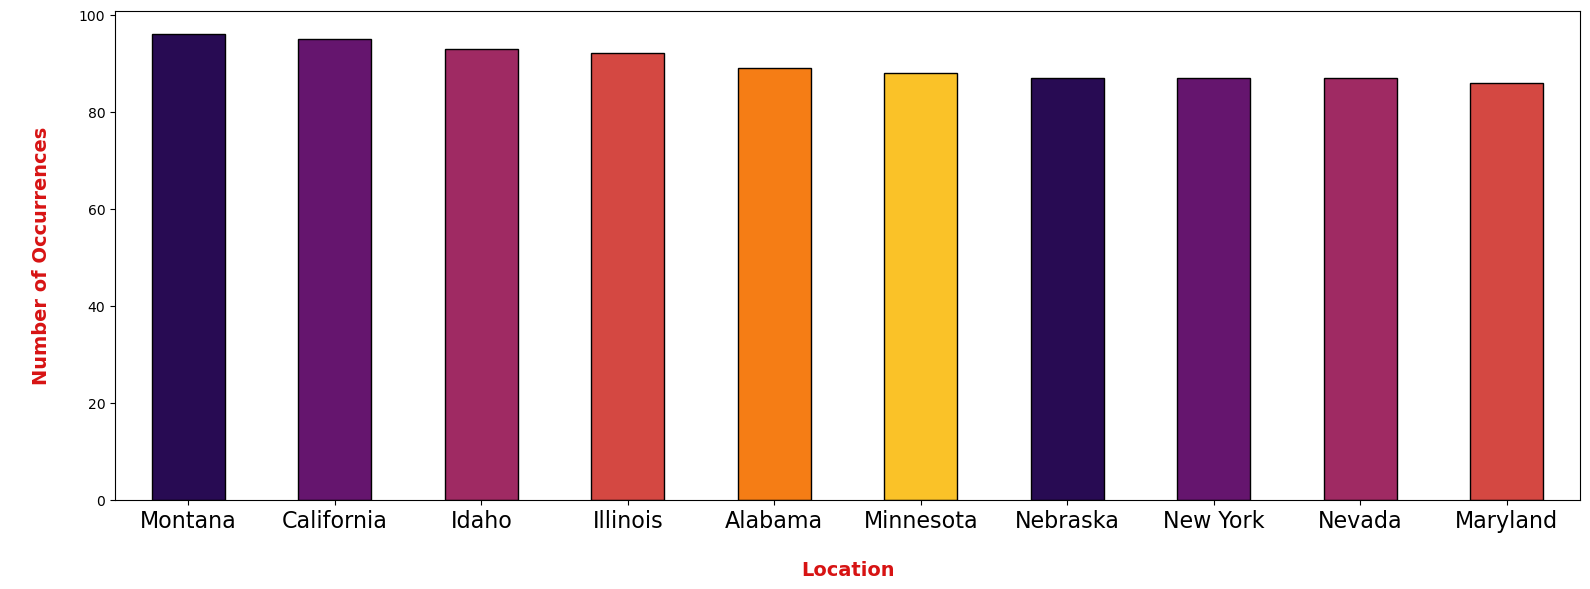

In [21]:
plt.figure(figsize = (16, 6))
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [22]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

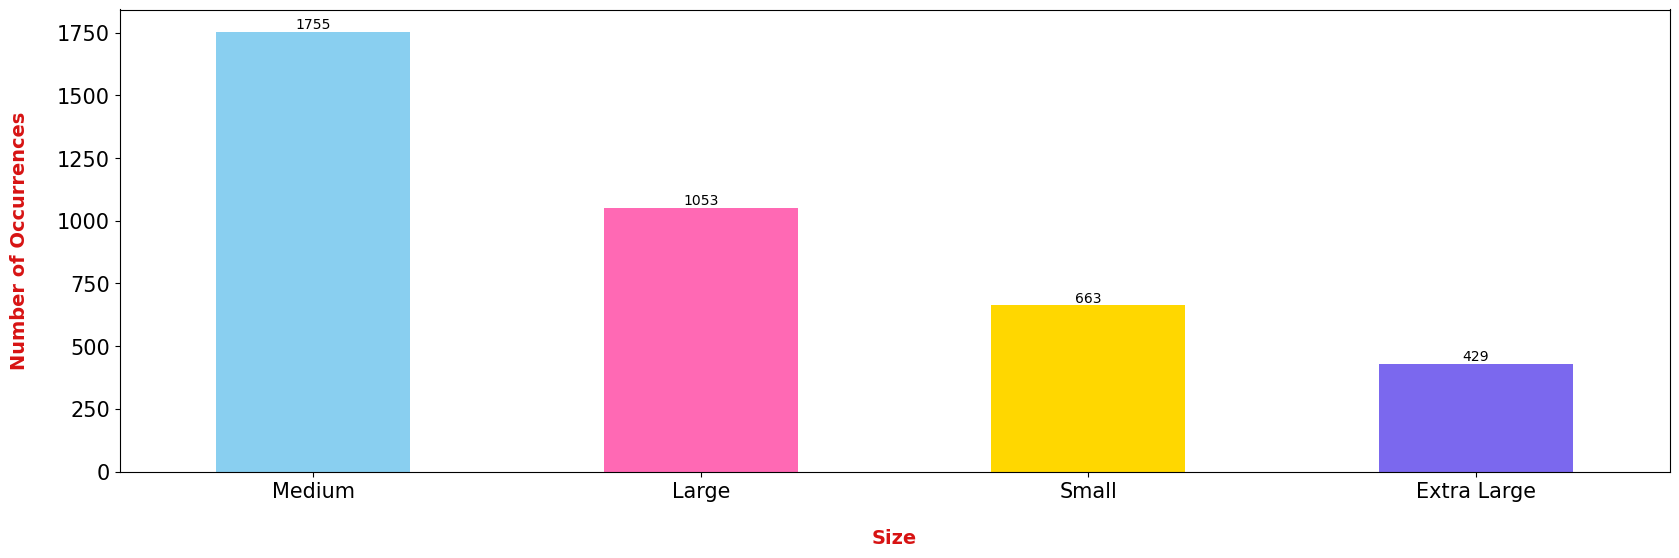

In [23]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

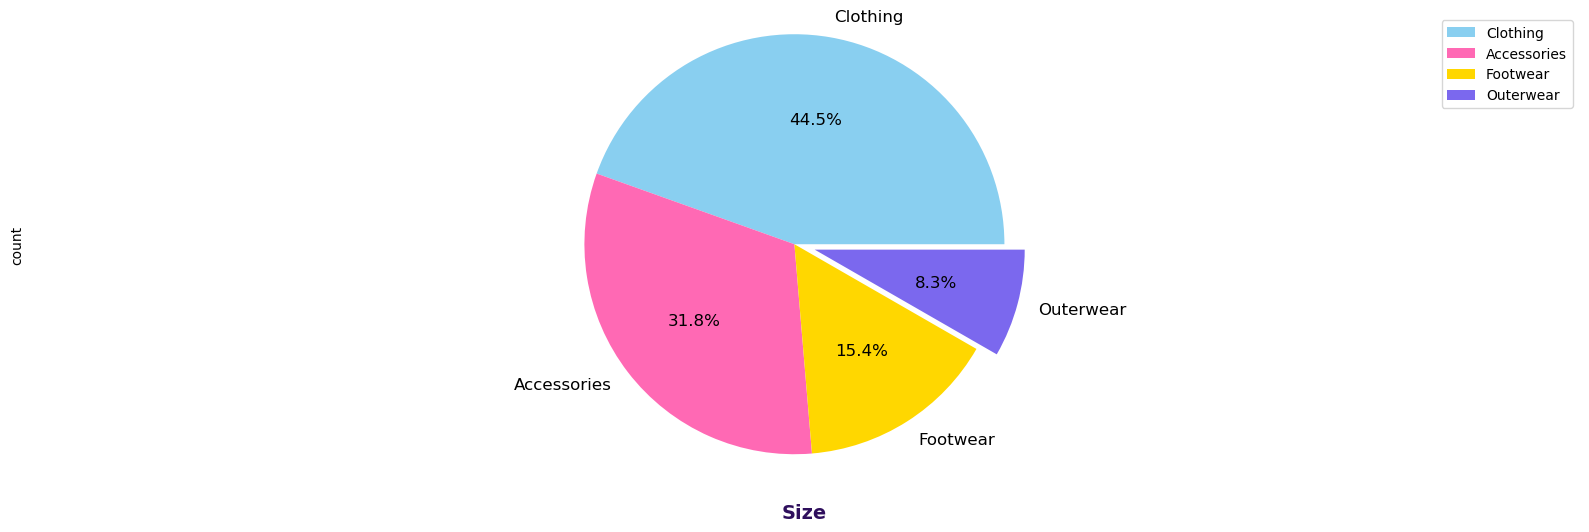

In [24]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [25]:
df["Color"].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

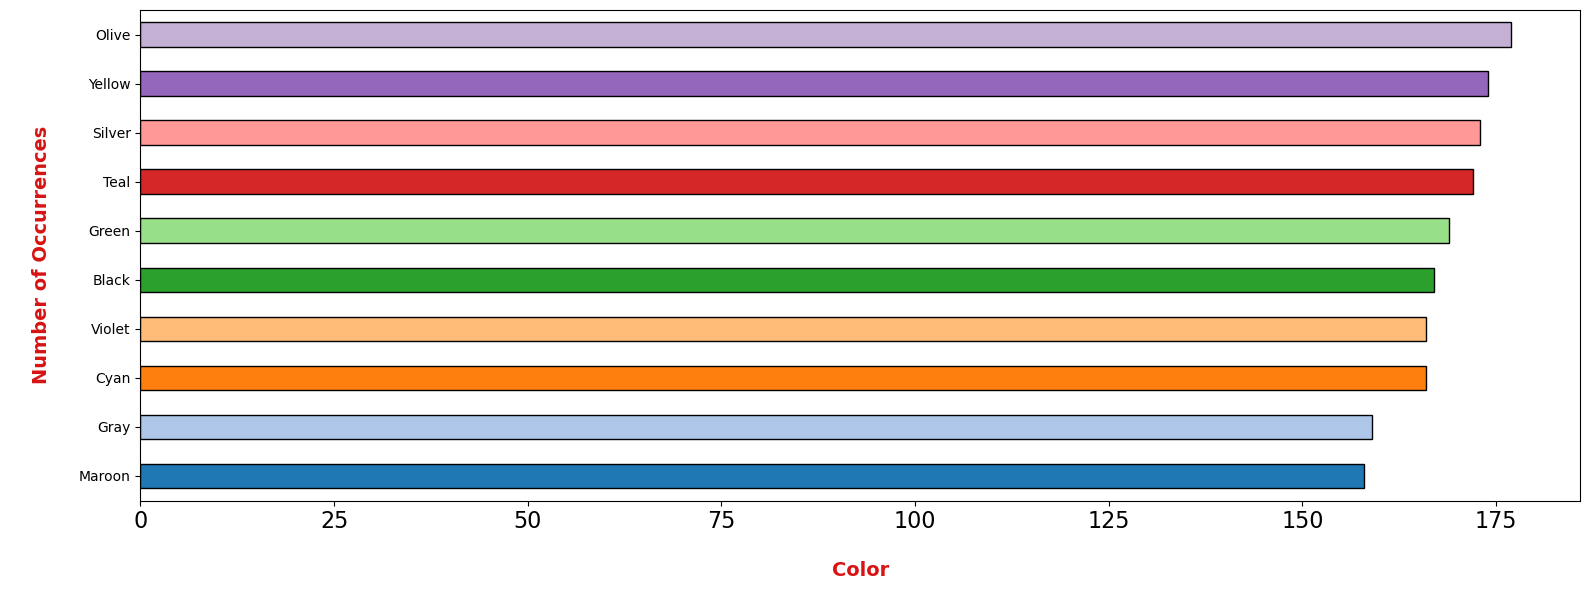

In [26]:
plt.figure(figsize = (16, 6))
df["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [27]:
df["Season"].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

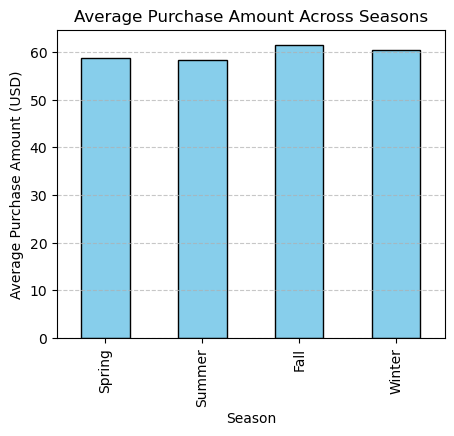

In [28]:

seasonal_data = df.groupby('Season')['Purchase Amount (USD)'].mean()

# Order seasons in a logical order (e.g., by calendar order)
ordered_seasons = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_data = seasonal_data.reindex(ordered_seasons)

# Plotting a bar chart
plt.figure(figsize = (5, 4))
seasonal_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Purchase Amount Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [29]:
# Find the most bought item for each season
most_bought_items = df.groupby('Season')['Item Purchased'].agg(lambda x: x.value_counts().index[0])

# Display the results
print("Most Bought Item for Each Season:")
print(most_bought_items)


Most Bought Item for Each Season:
Season
Fall          Jacket
Spring       Sweater
Summer         Pants
Winter    Sunglasses
Name: Item Purchased, dtype: object


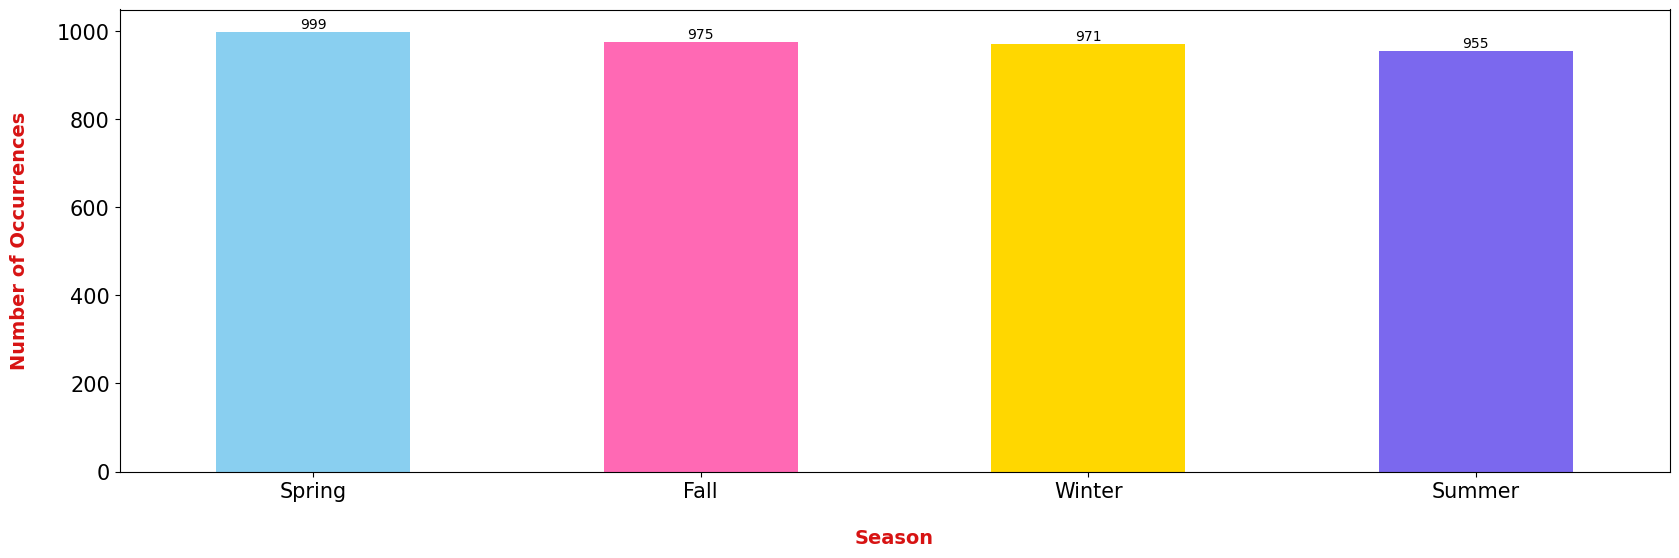

In [30]:
plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Season', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

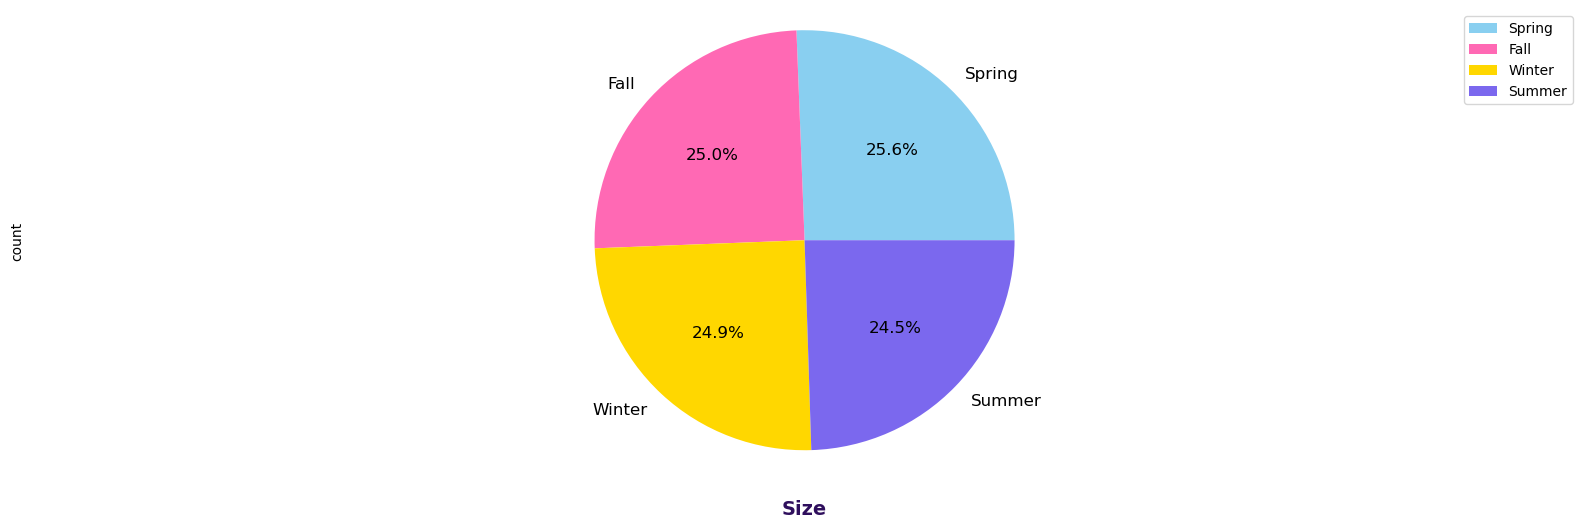

In [31]:
plt.figure(figsize = (20, 6))

counts = df["Season"].value_counts()
explode = (0, 0, 0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [32]:
df["Subscription Status"].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

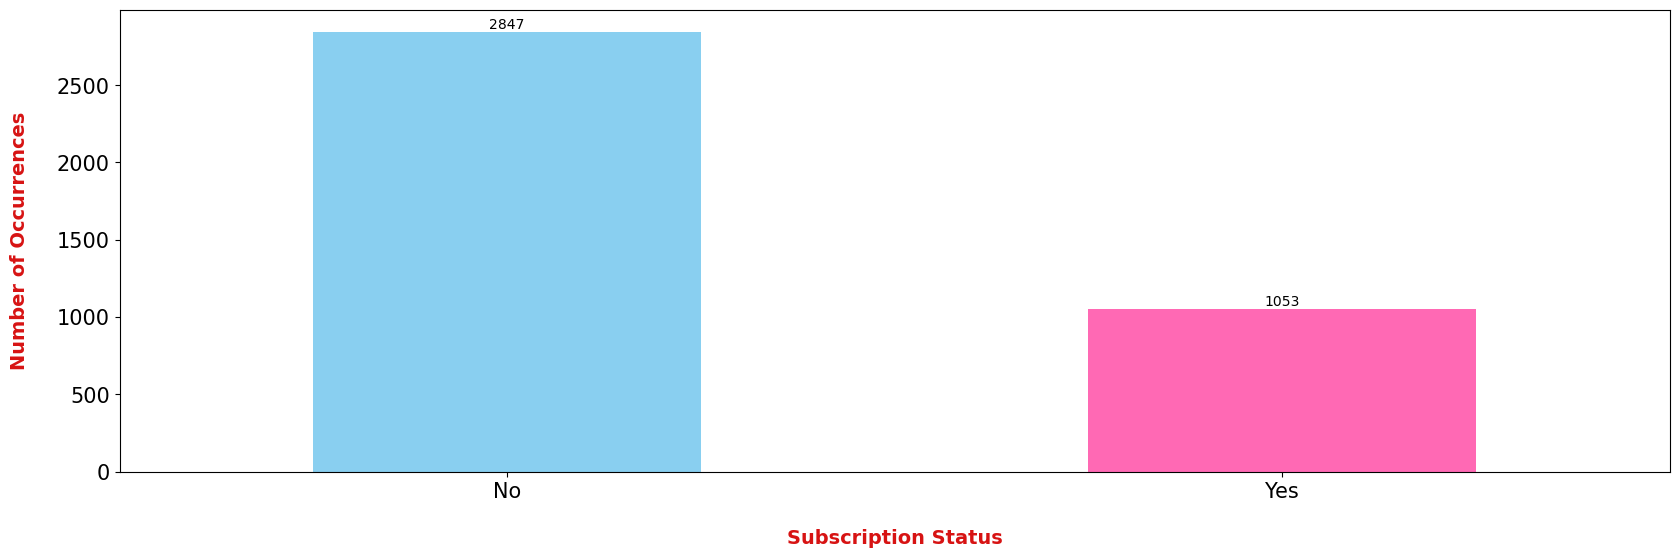

In [33]:
plt.figure(figsize = (20, 6))
ax = df["Subscription Status"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('No', 'Yes'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Subscription Status', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

<Figure size 2000x600 with 0 Axes>

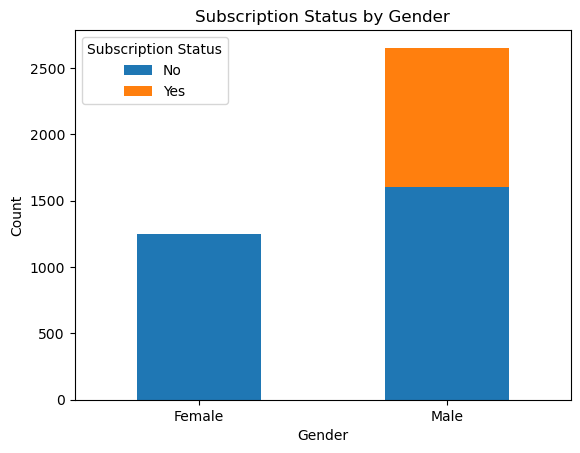

In [34]:
subscription_gender_counts = df.groupby(['Gender', 'Subscription Status']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

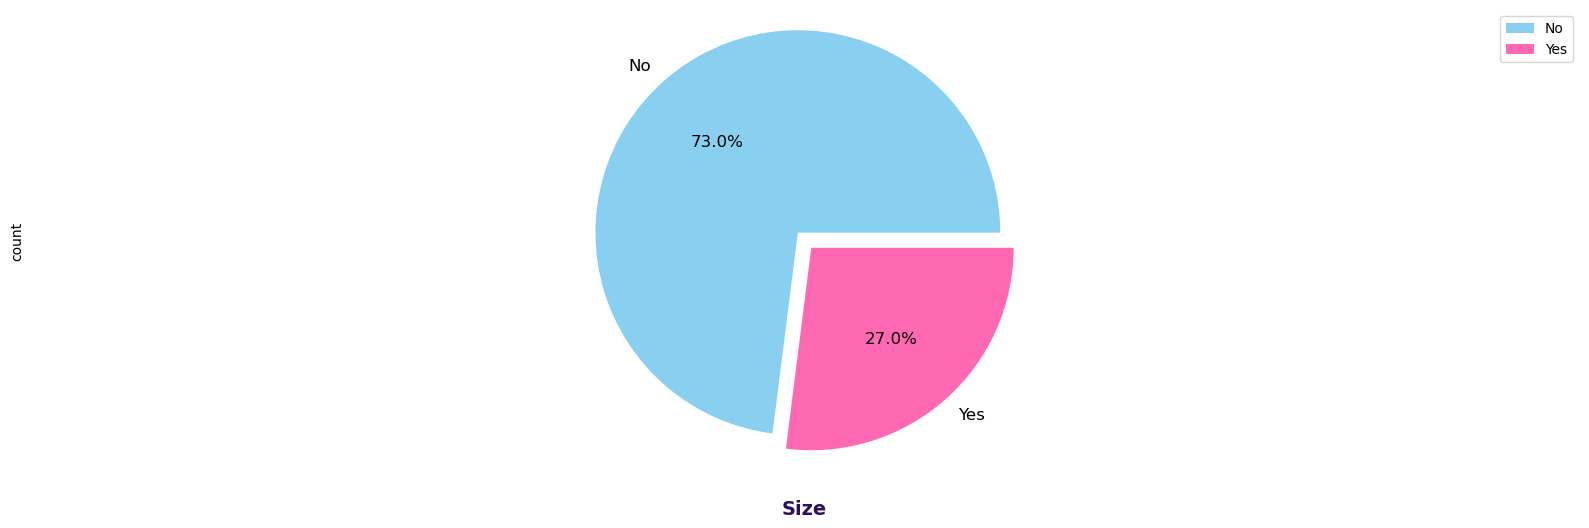

In [35]:
plt.figure(figsize = (20, 6))

counts = df["Subscription Status"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [36]:
df["Payment Method"].value_counts()

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

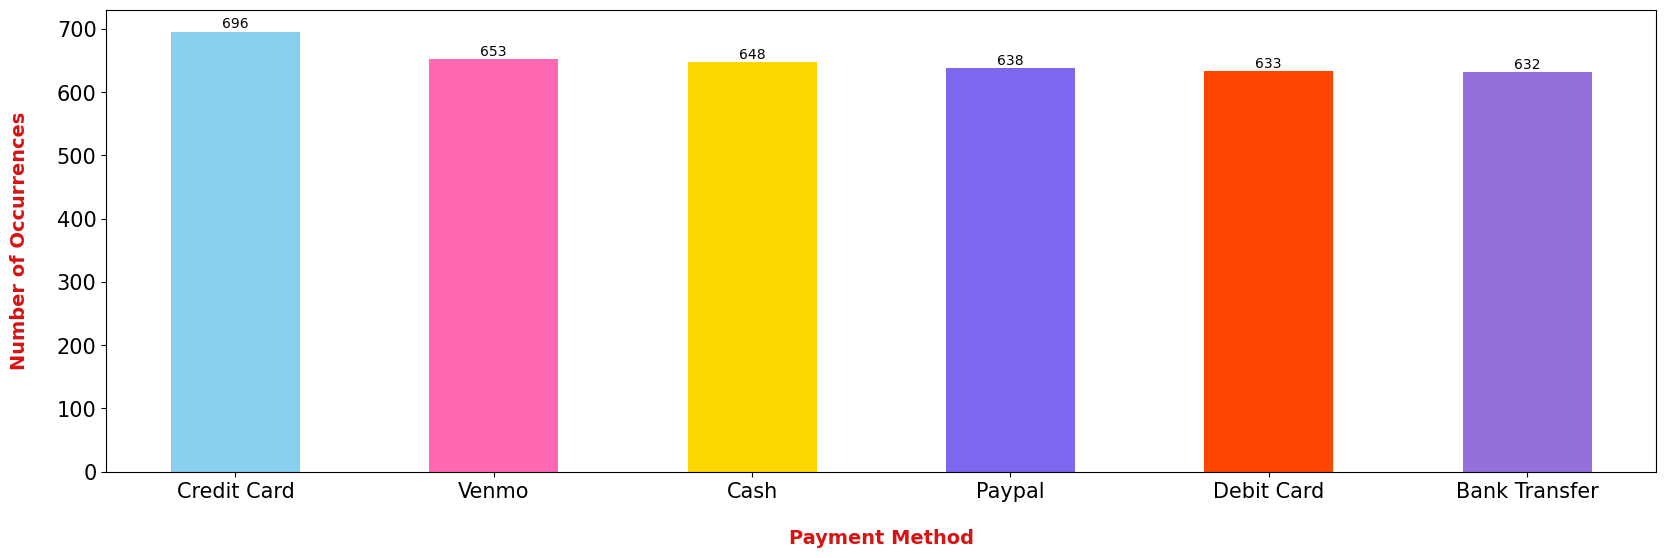

In [37]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

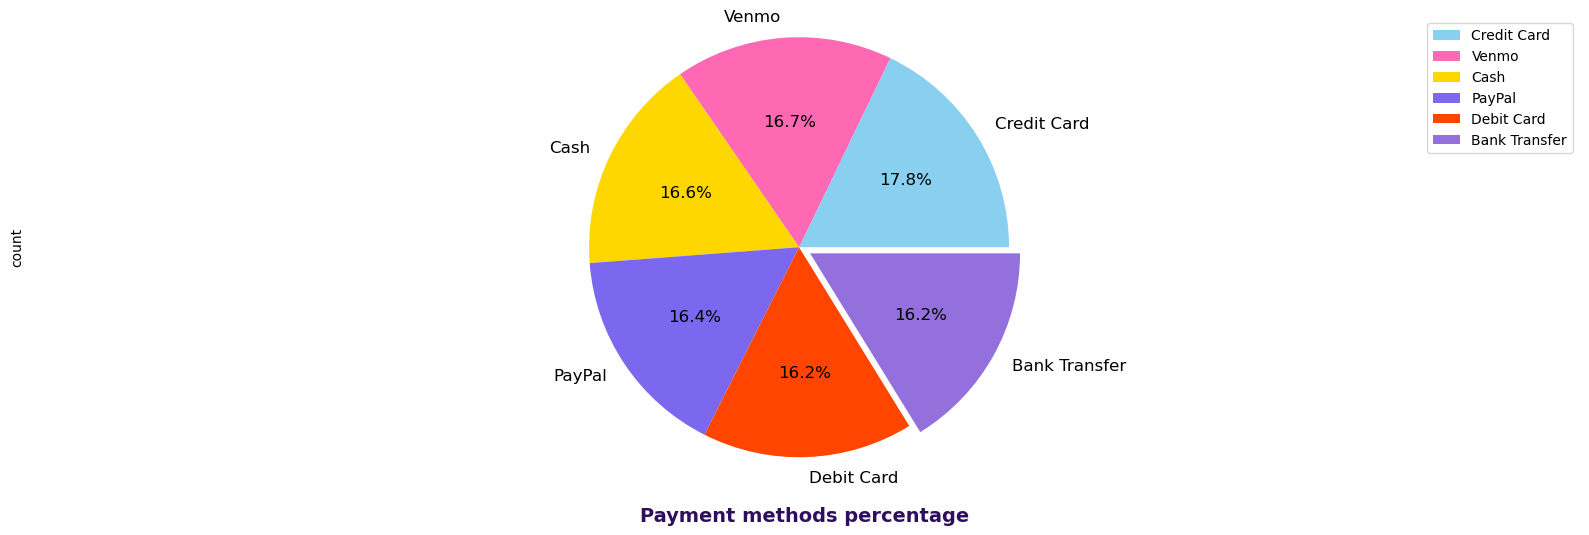

In [38]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Payment methods percentage', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [39]:
df["Shipping Type"].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

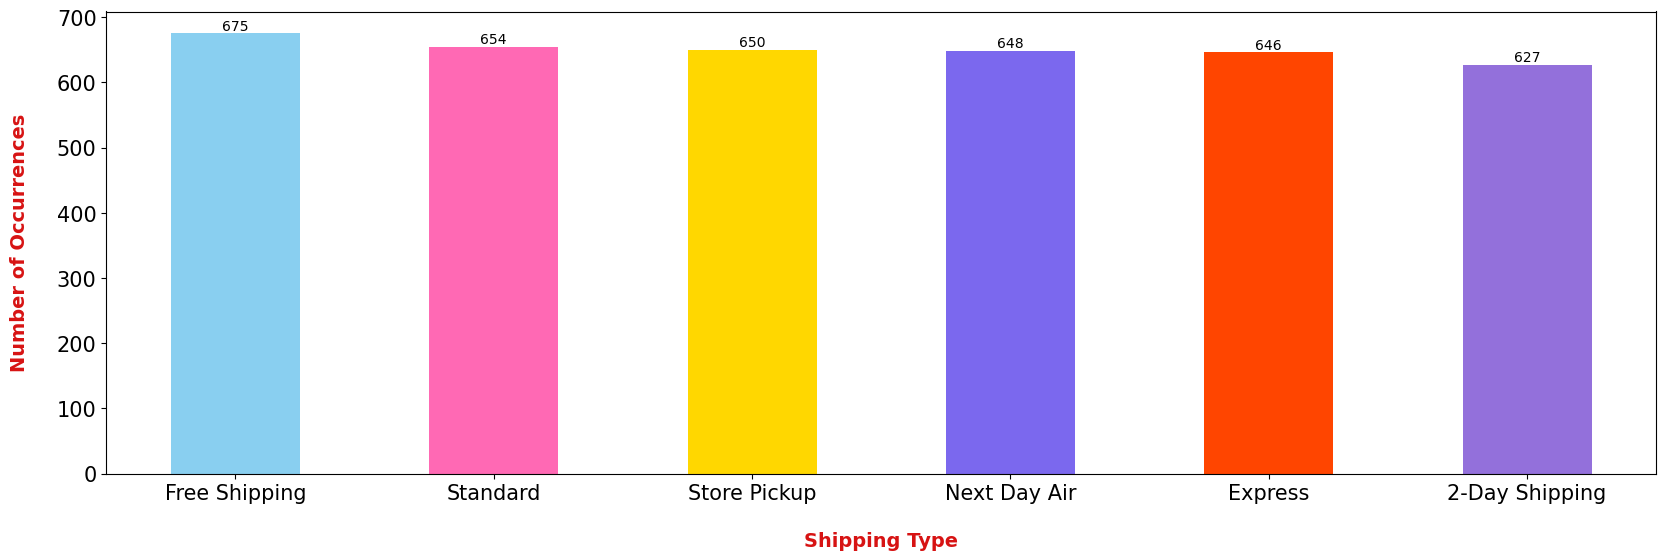

In [40]:
plt.figure(figsize = (20, 6))
ax = df["Shipping Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

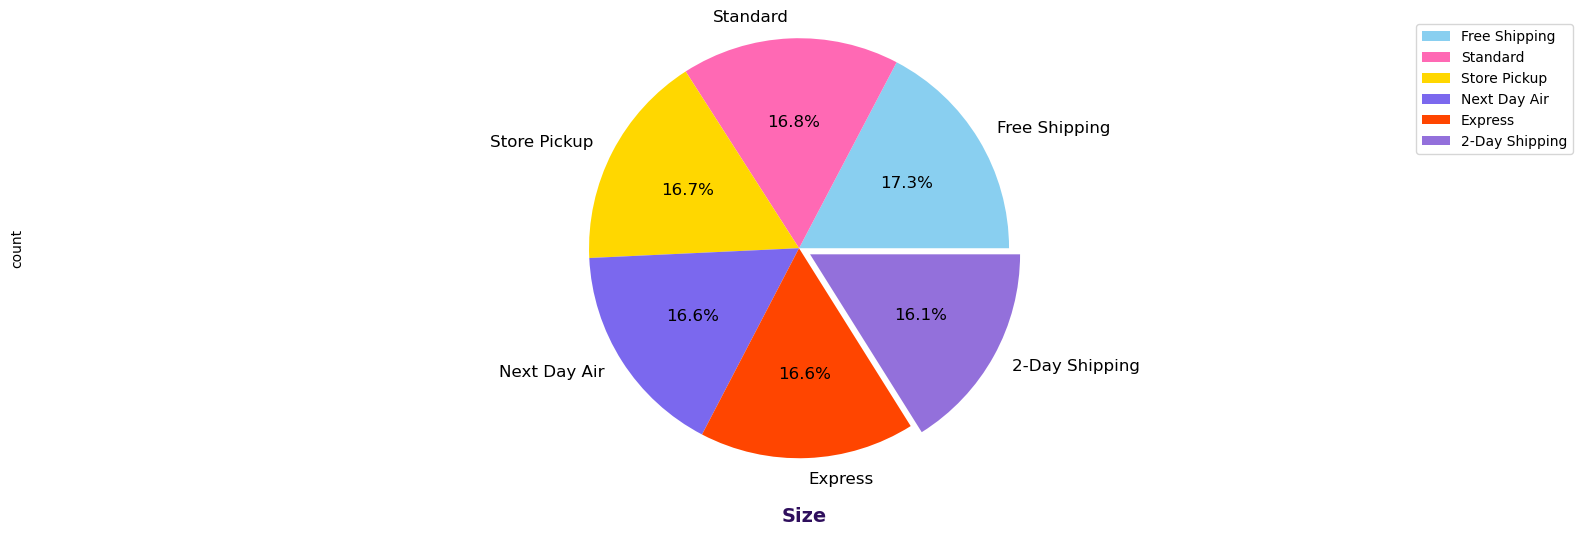

In [41]:
plt.figure(figsize = (20, 6))

counts = df["Shipping Type"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [43]:
df["Payment Method"].value_counts()

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

In [44]:
df["Frequency of Purchases"].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

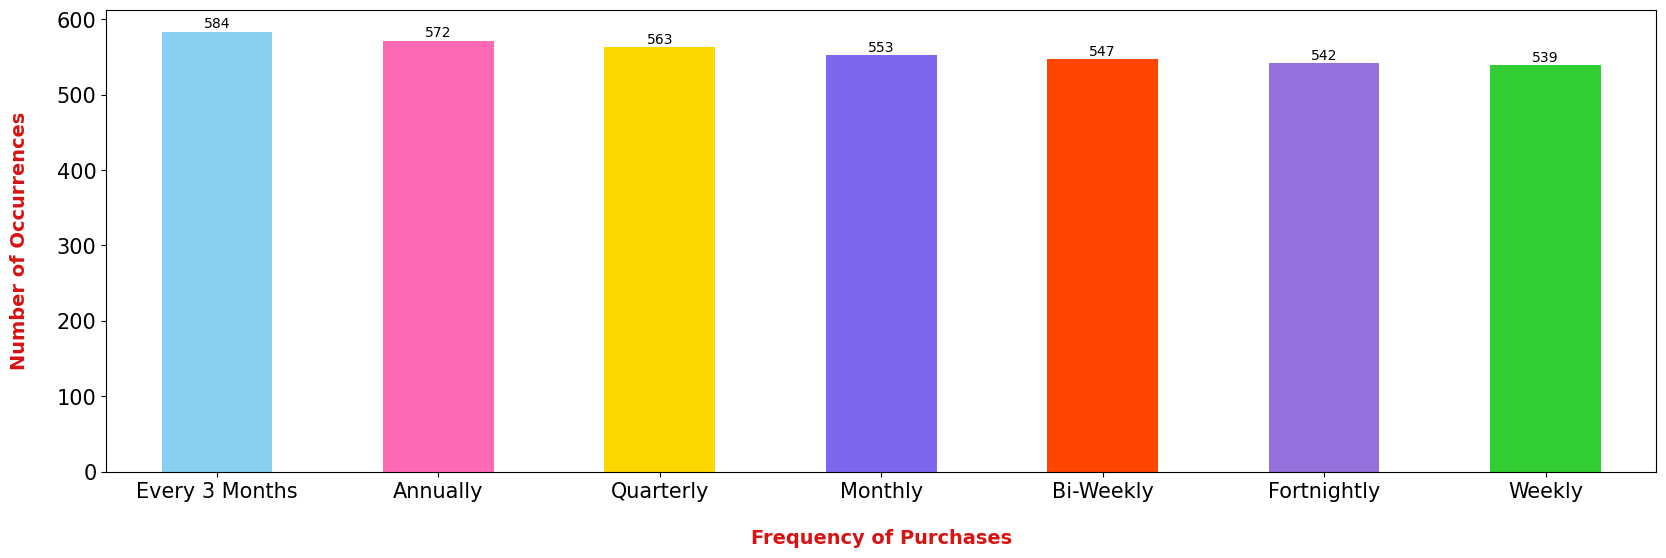

In [45]:
plt.figure(figsize = (20, 6))
ax = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

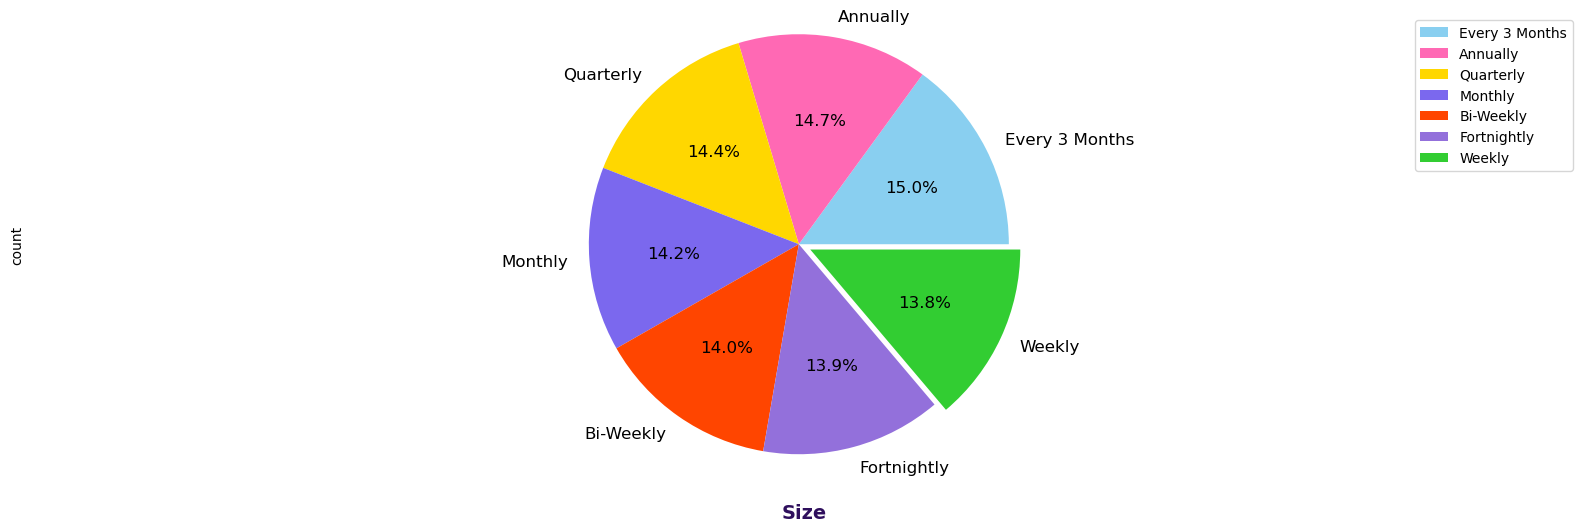

In [45]:
plt.figure(figsize = (20, 6))

counts = df["Frequency of Purchases"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [46]:
#What is the average age of customers in the data set
average_age = df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


In [47]:
#What is the most common item purchased ?
most_common_item = df['Item Purchased'].mode()[0]
print("Most Common Item Purchased:", most_common_item)

Most Common Item Purchased: Blouse


In [48]:
#What is the total purchase amount for each category ?
total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


In [49]:
#What is the average review rating for male customers and female customers separately ?
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


In [50]:
#What is the most common payment method used by customers ?
most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: Credit Card


In [51]:
#What is the median purchase amount (USD) ?
median_purchase_amount = df['Purchase Amount (USD)'].median()
print("Median Purchase Amount (USD):", median_purchase_amount)

Median Purchase Amount (USD): 60.0


In [52]:
#How many customers have opted for the Subscription ?
subscription_count = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Number of Customers with Subscription: ", subscription_count)

Number of Customers with Subscription:  1053


In [53]:
#What is the average purchase amount for customers with a subscription status of 'Yes' and 'No'?
avg_purchase_subscription_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purchase_subscription_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Subscription 'Yes':", avg_purchase_subscription_yes)
print("Average Purchase Amount for Subscription 'No':", avg_purchase_subscription_no)

Average Purchase Amount for Subscription 'Yes': 59.49192782526116
Average Purchase Amount for Subscription 'No': 59.865121180189675


In [54]:
#What is the most common season for purchases?
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchases:", most_common_season)

Most Common Season for Purchases: Spring


In [55]:
#What is the total purchase amount for each gender?
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Gender:")
print(total_purchase_by_gender)

Total Purchase Amount by Gender:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


In [56]:
#What is the average age of customers who made purchases in the Summer season?
average_age_summer = df[df['Season'] == 'Summer']['Age'].mean()
print("Average Age of Customers in the Summer Season:", average_age_summer)

Average Age of Customers in the Summer Season: 43.973821989528794


In [57]:
#How many customers used a promo code for their purchase?
promo_code_count = df[df['Promo Code Used'] == 'Yes']['Customer ID'].count()
print("Number of Customers who used Promo Code:", promo_code_count)

Number of Customers who used Promo Code: 1677


In [58]:
#What is the maximum and minimum review rating in the dataset?
max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print("Maximum Review Rating:", max_review_rating)
print("Minimum Review Rating:", min_review_rating)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


In [59]:
#What is the most common shipping type for customers with a review rating above 4?
common_shipping_high_rating = df[df['Review Rating'] > 4]['Shipping Type'].mode()[0]
print("Most Common Shipping Type for High Review Ratings:", common_shipping_high_rating)

Most Common Shipping Type for High Review Ratings: Standard


In [60]:
#How many customers have made more than 30 previous purchases?
customers_above_30_previous_purchases = df[df['Previous Purchases'] > 30]['Customer ID'].count()
print("Number of Customers with more than 30 Previous Purchases:", customers_above_30_previous_purchases)

Number of Customers with more than 30 Previous Purchases: 1549


In [61]:
#What is the average purchase amount for customers who have made more than 30 previous purchases?
avg_purchase_above_30_previous_purchases = df[df['Previous Purchases'] > 30]['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with more than 30 Previous Purchases:", avg_purchase_above_30_previous_purchases)

Average Purchase Amount for Customers with more than 30 Previous Purchases: 60.02840542285345


In [62]:
#What is the most common payment method for customers who shop in the Winter season?
total_purchase_free_shipping = df[df['Shipping Type'] == 'Free Shipping']['Purchase Amount (USD)'].sum()
print("Total Purchase Amount for 'Free Shipping' Shipping Type:", total_purchase_free_shipping)

Total Purchase Amount for 'Free Shipping' Shipping Type: 40777


In [63]:
#What is the total purchase amount for customers with a 'Free Shipping' shipping type?
total_purchase_free_shipping = df[df['Shipping Type'] == 'Free Shipping']['Purchase Amount (USD)'].sum()
print("Total Purchase Amount for 'Free Shipping' Shipping Type:", total_purchase_free_shipping)

Total Purchase Amount for 'Free Shipping' Shipping Type: 40777


In [64]:
#What is the average purchase amount for customers who used a discount?
avg_purchase_with_discount = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with Discount Applied:", avg_purchase_with_discount)

Average Purchase Amount for Customers with Discount Applied: 59.27906976744186


In [65]:
# Count the number of customers who purchased items with and without a promo code
promo_counts = df['Promo Code Used'].value_counts()

# Display the result
print('Number of customers who purchased items:')
print(f'With Promo Code: {promo_counts["Yes"] if "Yes" in promo_counts else 0}')
print(f'Without Promo Code: {promo_counts["No"] if "No" in promo_counts else 0}')


Number of customers who purchased items:
With Promo Code: 1677
Without Promo Code: 2223


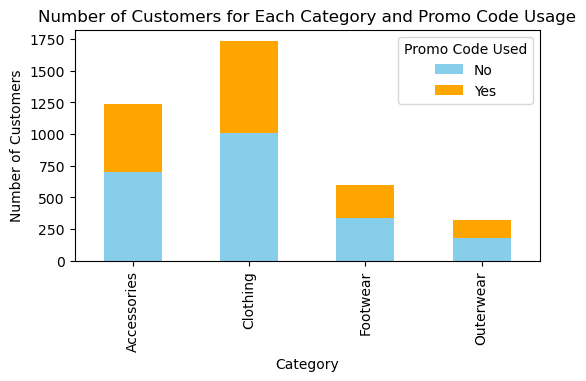

In [66]:
# Group by 'Category' and 'Promo Code Used', and count the number of unique customers
category_promo_counts = df.groupby(['Category', 'Promo Code Used'])['Customer ID'].nunique().reset_index()

# Pivot the data for better visualization
pivot_data = category_promo_counts.pivot(index='Category', columns='Promo Code Used', values='Customer ID').fillna(0)

# Plotting a bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(6, 3), color=['skyblue', 'orange'])
ax.set_title('Number of Customers for Each Category and Promo Code Usage')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Customers')
ax.legend(title='Promo Code Used', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


In [67]:
#What is the most common category of items purchased by female customers with a review rating below 3?
common_category_low_rating_female = df[(df['Gender'] == 'Female') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most Common Category for Low Review Rating Female Customers:", common_category_low_rating_female)

Most Common Category for Low Review Rating Female Customers: Clothing


In [68]:
pd.crosstab(df['Location'],df['Subscription Status'])

Subscription Status,No,Yes
Location,,
Alabama,67,22
Alaska,54,18
Arizona,49,16
Arkansas,59,20
California,66,29
Colorado,54,21
Connecticut,62,16
Delaware,58,28
Florida,47,21


In [69]:
#What is the average age of customers who made purchases with a review rating above 4 and used a promo code?
average_age_high_rating_promo = df[(df['Review Rating'] > 4) & (df['Promo Code Used'] == 'Yes')]['Age'].mean()
print("Average Age of Customers with High Review Ratings and Promo Code Used:", average_age_high_rating_promo)

Average Age of Customers with High Review Ratings and Promo Code Used: 43.9872


In [70]:
#What is the total purchase amount for customers in each location?
total_purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Location:")
print(total_purchase_by_location)

Total Purchase Amount by Location:
Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee    

In [70]:
#What is the average purchase amount for customers who have a subscription and used Venmo as the payment method?
avg_purchase_subscription_venmo = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'Venmo')]['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with Subscription and Venmo Payment Method:", avg_purchase_subscription_venmo)

Average Purchase Amount for Customers with Subscription and Venmo Payment Method: 60.71264367816092


In [71]:
#What is the frequency distribution of the 'Frequency of Purchases' column?
purchase_frequency_distribution = df['Frequency of Purchases'].value_counts()
print("Frequency Distribution of Purchase Frequency:")
print(purchase_frequency_distribution)

Frequency Distribution of Purchase Frequency:
Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


In [72]:
#What is the average purchase amount for each color of items?
avg_purchase_by_color = df.groupby('Color')['Purchase Amount (USD)'].mean()
print("Average Purchase Amount by Color:")
print(avg_purchase_by_color)

Average Purchase Amount by Color:
Color
Beige       60.41
Black       58.40
Blue        56.95
Brown       59.06
Charcoal    60.63
Cyan        61.89
Gold        61.01
Gray        62.49
Green       65.70
Indigo      56.25
Lavender    59.13
Magenta     57.13
Maroon      59.53
Olive       58.15
Orange      60.89
Peach       59.19
Pink        60.59
Purple      60.01
Red         59.32
Silver      56.83
Teal        60.81
Turquoise   55.61
Violet      61.72
White       62.64
Yellow      59.24
Name: Purchase Amount (USD), dtype: float64


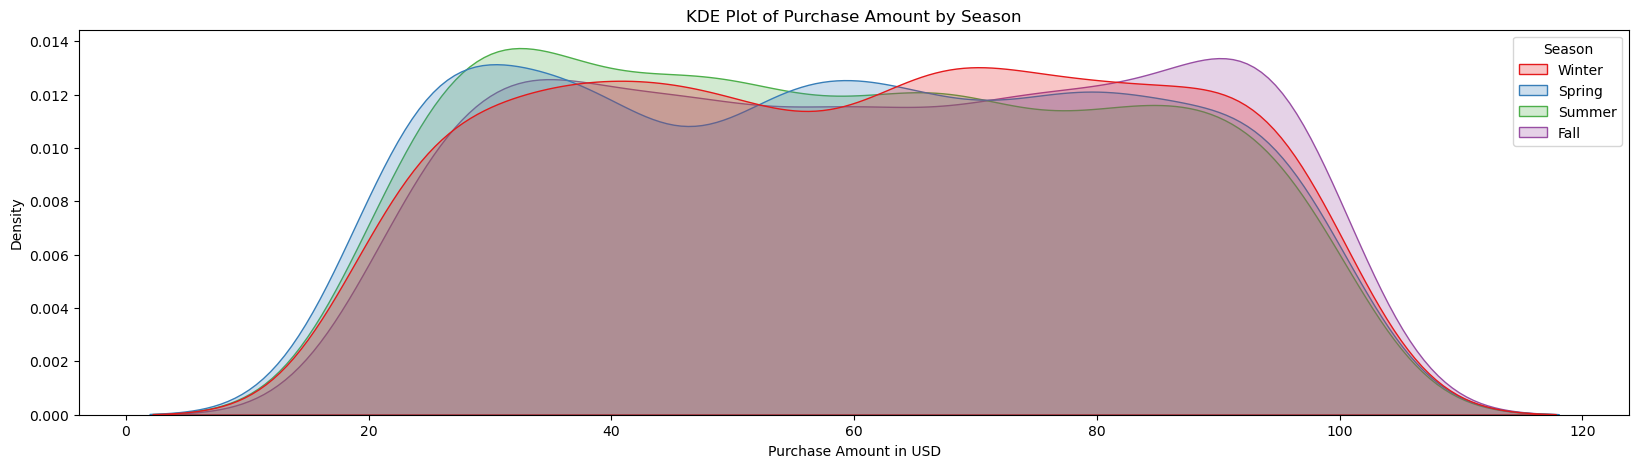

In [73]:
#KDE plot for Purchase Amount by Season
plt.figure(figsize=(20, 5))
sns.kdeplot(data = df, x = 'Purchase Amount (USD)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount in USD')
plt.show()

In [74]:
#What is the most common payment method for customers who purchased items in the Fall season?
common_payment_fall = df[df['Season'] == 'Fall']['Payment Method'].mode()[0]
print("Most Common Payment Method for Fall Season Purchases:", common_payment_fall)

Most Common Payment Method for Fall Season Purchases: Credit Card


In [75]:
#How many customers have made a purchase in each category?
purchase_count_by_category = df['Category'].value_counts()
print("Purchase Count by Category:")
print(purchase_count_by_category)


Purchase Count by Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [76]:
#What is the most common payment method for customers who purchased items in the Fall season?
common_payment_fall = df[df['Season'] == 'Fall']['Payment Method'].mode()[0]
print("Most Common Payment Method for Fall Season Purchases:", common_payment_fall)

Most Common Payment Method for Fall Season Purchases: Credit Card


In [77]:
#How many customers have made a purchase in each category?
purchase_count_by_category = df['Category'].value_counts()
print("Purchase Count by Category:")
print(purchase_count_by_category)

Purchase Count by Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [78]:
#What is the average age of customers who purchased accessories with a discount applied?
avg_age_accessories_discount = df[(df['Category'] == 'Accessories') & (df['Discount Applied'] == 'Yes')]['Age'].mean()
print("Average Age of Customers who purchased Accessories with Discount Applied:", avg_age_accessories_discount)

Average Age of Customers who purchased Accessories with Discount Applied: 44.23941068139963


In [79]:
#What is the total purchase amount for each size of clothing items (XL, L, M, S)?
total_purchase_by_size = df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Size for Clothing Items:")
print(total_purchase_by_size)

Total Purchase Amount by Size for Clothing Items:
Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64


In [80]:
#What is the total purchase amount for customers who have made more than 40 previous purchases?
total_purchase_above_40_previous = df[df['Previous Purchases'] > 40]['Purchase Amount (USD)'].sum()
print("Total Purchase Amount for Customers with more than 40 Previous Purchases:", total_purchase_above_40_previous)

Total Purchase Amount for Customers with more than 40 Previous Purchases: 46590


In [81]:
#What is the most common location for customers who purchased socks with a discount applied?
common_location_socks_discount = df[(df['Category'] == 'Clothing') & (df['Discount Applied'] == 'Yes')]['Location'].mode()[0]
print("Most Common Location for Socks Purchases with Discount Applied:", common_location_socks_discount)

Most Common Location for Socks Purchases with Discount Applied: Alabama


In [82]:
#What is the average purchase amount for customers who have a subscription and used Venmo as the payment method, but did not use a promo code?
avg_purchase_subscription_venmo_no_promo = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'Venmo') & (df['Promo Code Used'] == 'No')]['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with Subscription, Venmo Payment, and No Promo Code:", avg_purchase_subscription_venmo_no_promo)

Average Purchase Amount for Customers with Subscription, Venmo Payment, and No Promo Code: nan


In [83]:
#What is the most common item purchased by customers in Louisiana with a review rating of 4 or higher?
common_item_high_rating_louisiana = df[(df['Location'] == 'Louisiana') & (df['Review Rating'] >= 4)]['Item Purchased'].mode()[0]
print("Most Common Item Purchased by High-Rating Customers in Louisiana:", common_item_high_rating_louisiana)

Most Common Item Purchased by High-Rating Customers in Louisiana: Sweater


In [84]:
#What is the total purchase amount for customers who made purchases in the Fall season and used a credit card as the payment method?
total_purchase_fall_credit_card = df[(df['Season'] == 'Fall') & (df['Payment Method'] == 'Credit Card')]['Purchase Amount (USD)'].sum()
print("Total Purchase Amount for Fall Season Purchases with Credit Card Payment Method:", total_purchase_fall_credit_card)

Total Purchase Amount for Fall Season Purchases with Credit Card Payment Method: 11411


In [85]:
#How many customers have a subscription status of 'Yes' and used a promo code for their purchase?
subscription_promo_count = df[(df['Subscription Status'] == 'Yes') & (df['Promo Code Used'] == 'Yes')]['Customer ID'].count()
print("Number of Customers with Subscription and Promo Code Used: ", subscription_promo_count)

Number of Customers with Subscription and Promo Code Used:  1053


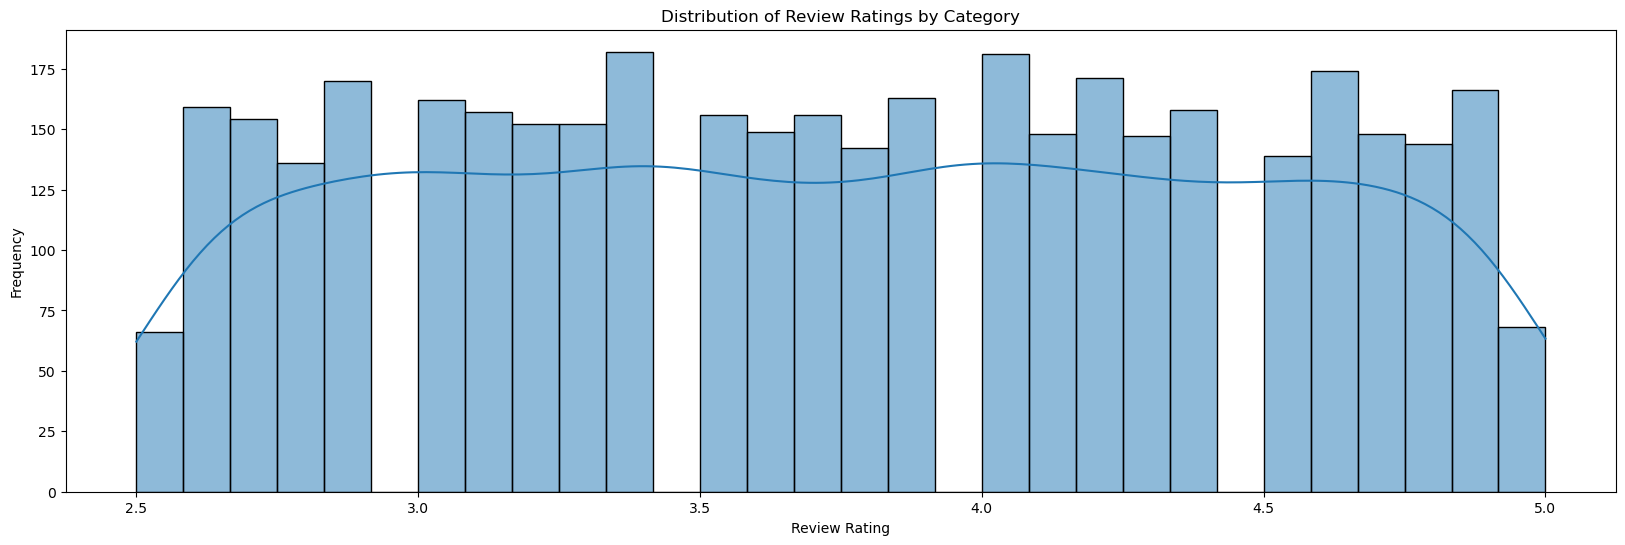

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(20, 6))

# Create a histogram
sns.histplot(df, x='Review Rating', bins=30, kde=True)

# Set plot title and labels
plt.title('Distribution of Review Ratings by Category')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()


<Figure size 2000x1200 with 0 Axes>

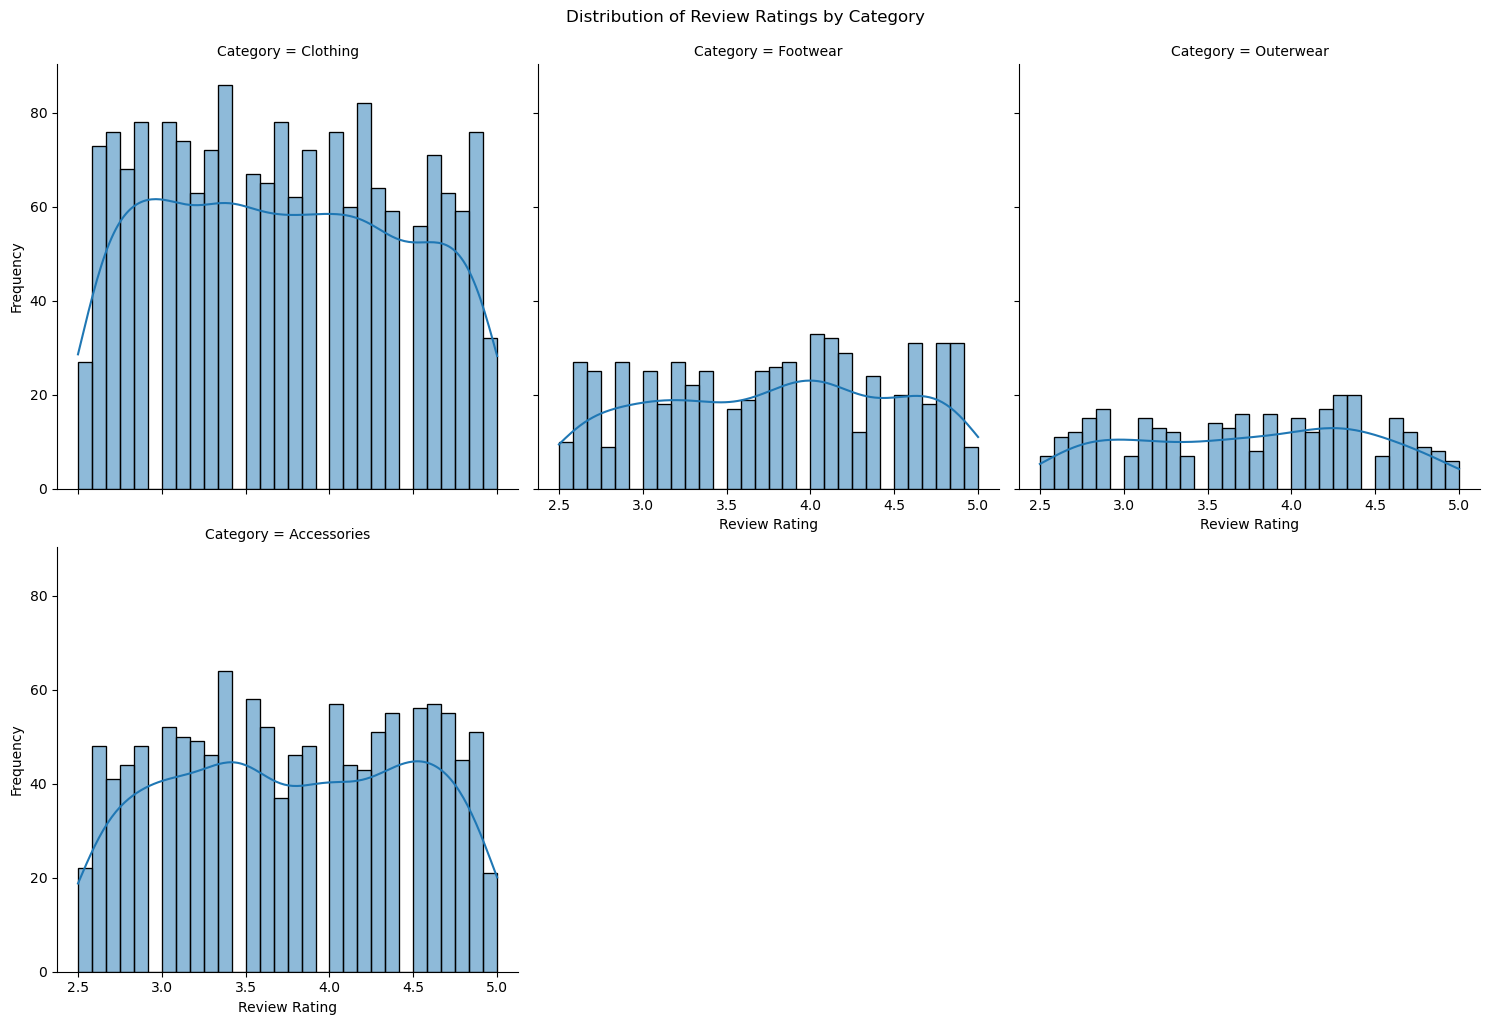

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(20, 12))

# Create a FacetGrid for each category
g = sns.FacetGrid(df, col='Category', col_wrap=3, height=5)
g.map(sns.histplot, 'Review Rating', bins=30, kde=True)

# Set common titles and labels
g.fig.suptitle('Distribution of Review Ratings by Category', y=1.02)
g.set_axis_labels('Review Rating', 'Frequency')

# Show the plot
plt.show()
